# Data visualization test(Jun 23th)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation


In [15]:
# file_path = "tip1/zv1_zd5_t0_20230622_181109.csv"
file_path = "tip1/zv1_zd6_t8_20230622_174706.csv"
# file_path2 = "tip1/vac_zv1_zd6_t8_20230626_145851.csv"
file_path2 = "tip1/zv1_zd6_t0_20230622_180037.csv"


sensorNum = 4

In [16]:
# Read data from csv file, first row is header
df = pd.read_csv(file_path, header=0)
df_vac = pd.read_csv(file_path2, header=0)

In [28]:
print(df.shape, df_vac.shape)

(7988, 7)

In [31]:
# Delete the rows if z is 0 
df = df[df.z != 0]
df_vac = df_vac[df_vac.z != 0]
print(df.shape, df_vac.shape)

(6834, 7) (4137, 7)


In [9]:
# calibrate data based on the average of the first 100 data points
df = df - df.iloc[0:100].mean()
df_vac = df_vac - df_vac.iloc[0:100].mean()


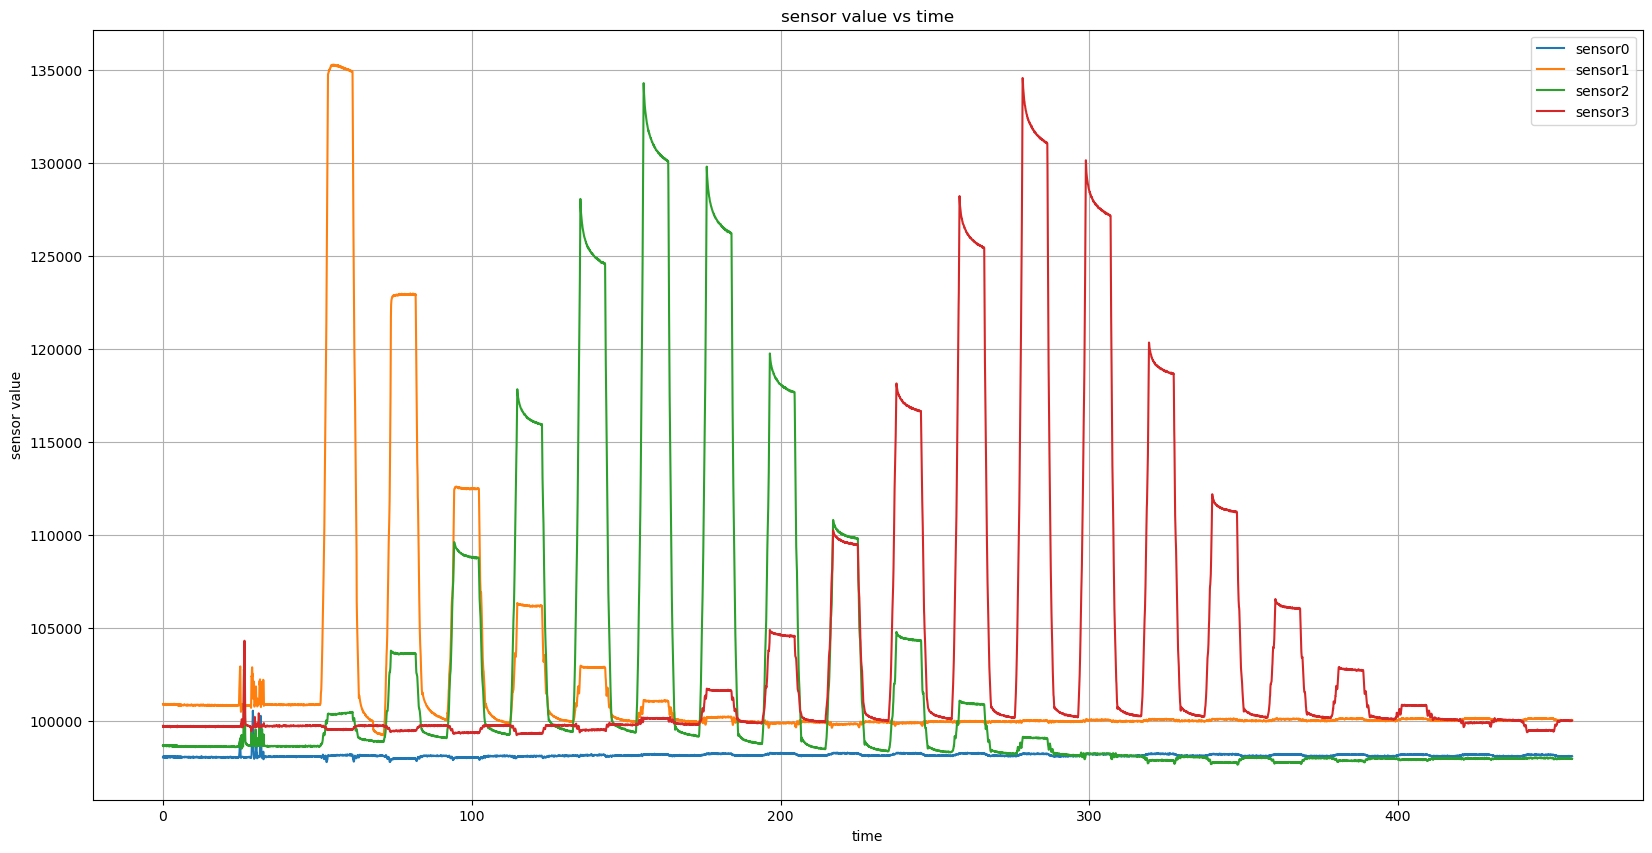

In [21]:

plt.figure(figsize=(20,10))
plt.plot(df['time'], df['Sensor_0'], label='sensor0')
plt.plot(df['time'], df['Sensor_1'], label='sensor1')
plt.plot(df['time'], df['Sensor_2'], label='sensor2')
plt.plot(df['time'], df['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('time')
plt.ylabel('sensor value')
plt.title('sensor value vs time')
plt.grid(True)
plt.show()


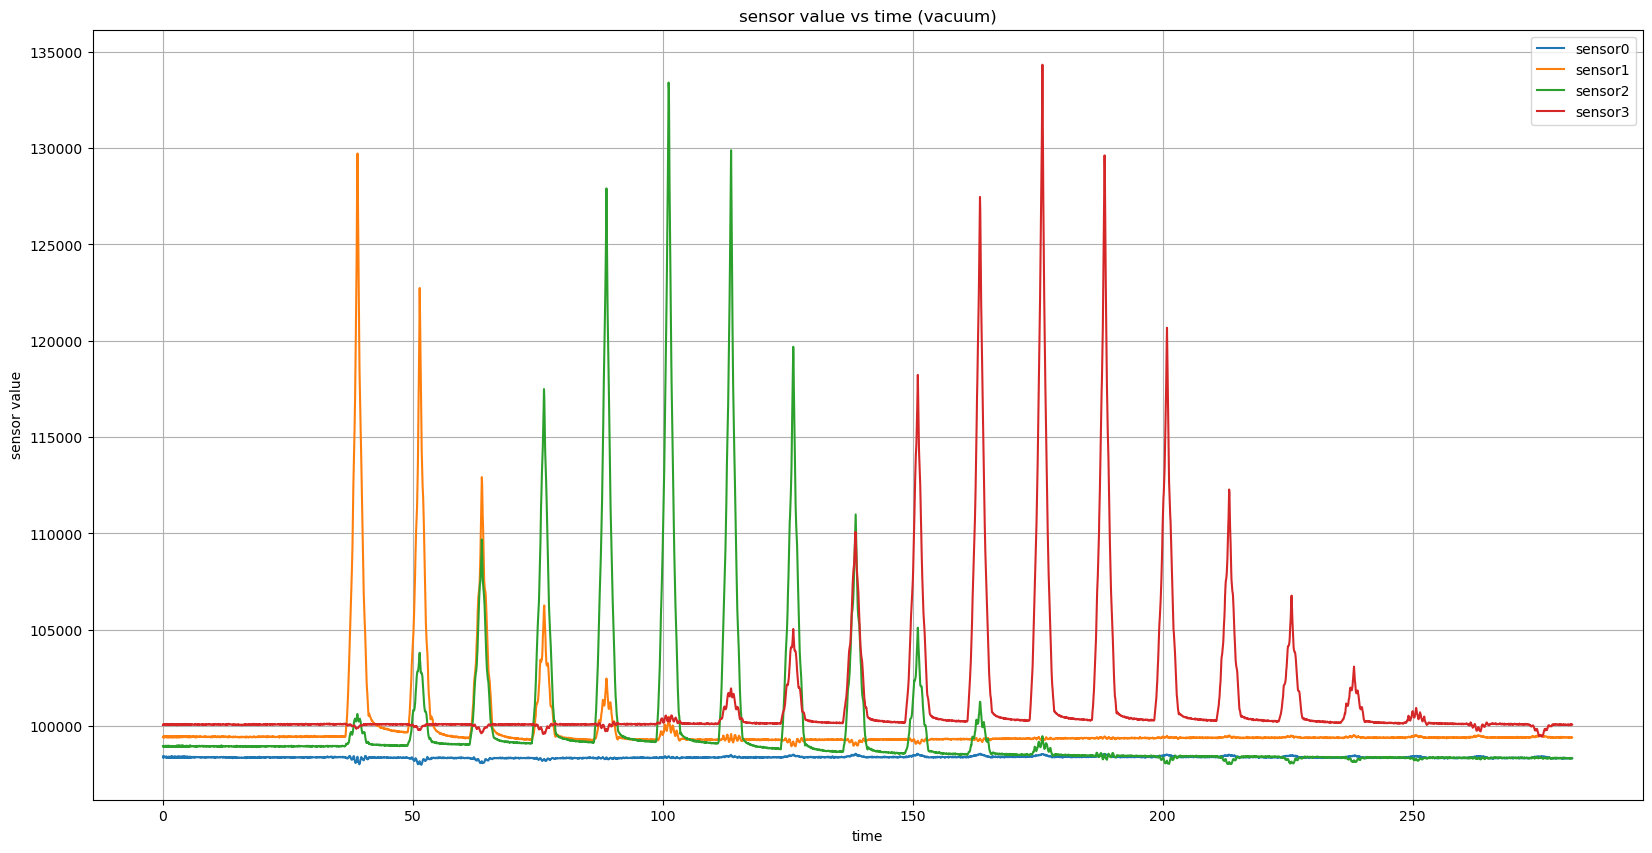

In [18]:

plt.figure(figsize=(20,10))
plt.plot(df_vac['time'], df_vac['Sensor_0'], label='sensor0')
plt.plot(df_vac['time'], df_vac['Sensor_1'], label='sensor1')
plt.plot(df_vac['time'], df_vac['Sensor_2'], label='sensor2')
plt.plot(df_vac['time'], df_vac['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('time')
plt.ylabel('sensor value')
plt.title('sensor value vs time (vacuum)')
plt.grid(True)
plt.show()


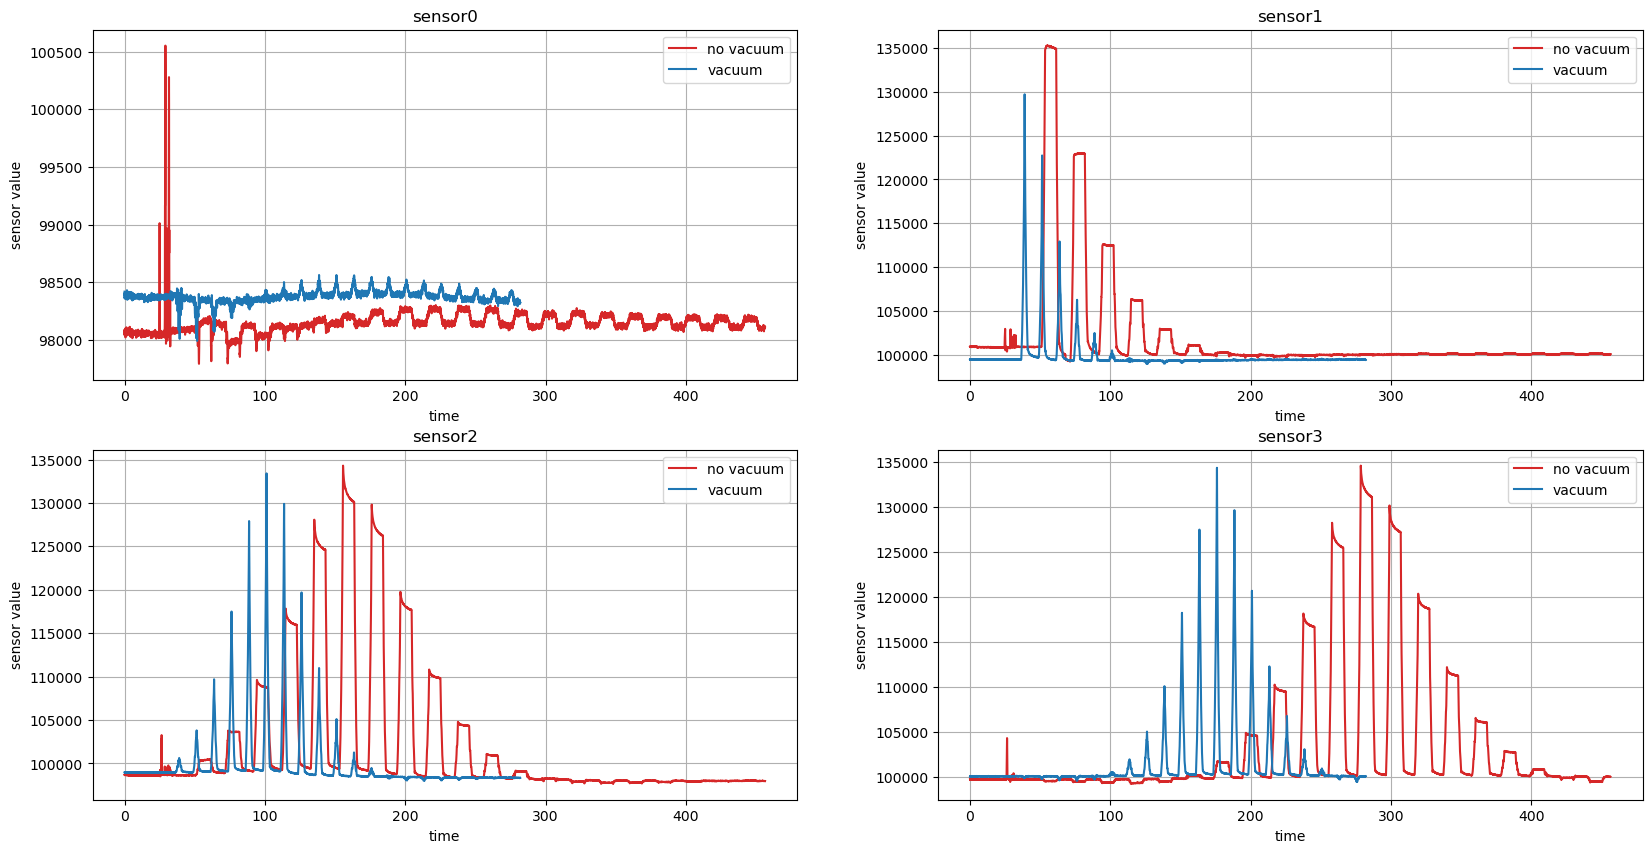

In [25]:
# Subplot of sensor value vs time
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0, 0].plot(df['time'], df['Sensor_0'], 'tab:red')
axs[0, 0].plot(df_vac['time'], df_vac['Sensor_0'], 'tab:blue')
axs[0, 0].set_title('sensor0')
axs[0, 0].set_ylabel('sensor value')
axs[0, 0].set_xlabel('time')
axs[0, 0].grid(True)
axs[0, 0].legend(['no vacuum', 'vacuum'])

axs[0, 1].plot(df['time'], df['Sensor_1'], 'tab:red')
axs[0, 1].plot(df_vac['time'], df_vac['Sensor_1'], 'tab:blue')
axs[0, 1].set_title('sensor1')
axs[0, 1].set_ylabel('sensor value')
axs[0, 1].set_xlabel('time')
axs[0, 1].grid(True)
axs[0, 1].legend(['no vacuum', 'vacuum'])

axs[1, 0].plot(df['time'], df['Sensor_2'], 'tab:red')
axs[1, 0].plot(df_vac['time'], df_vac['Sensor_2'], 'tab:blue')
axs[1, 0].set_title('sensor2')
axs[1, 0].set_ylabel('sensor value')
axs[1, 0].set_xlabel('time')
axs[1, 0].grid(True)
axs[1, 0].legend(['no vacuum', 'vacuum'])

axs[1, 1].plot(df['time'], df['Sensor_3'], 'tab:red')
axs[1, 1].plot(df_vac['time'], df_vac['Sensor_3'], 'tab:blue')
axs[1, 1].set_title('sensor3')
axs[1, 1].set_ylabel('sensor value')
axs[1, 1].set_xlabel('time')
axs[1, 1].grid(True)
axs[1, 1].legend(['no vacuum', 'vacuum'])

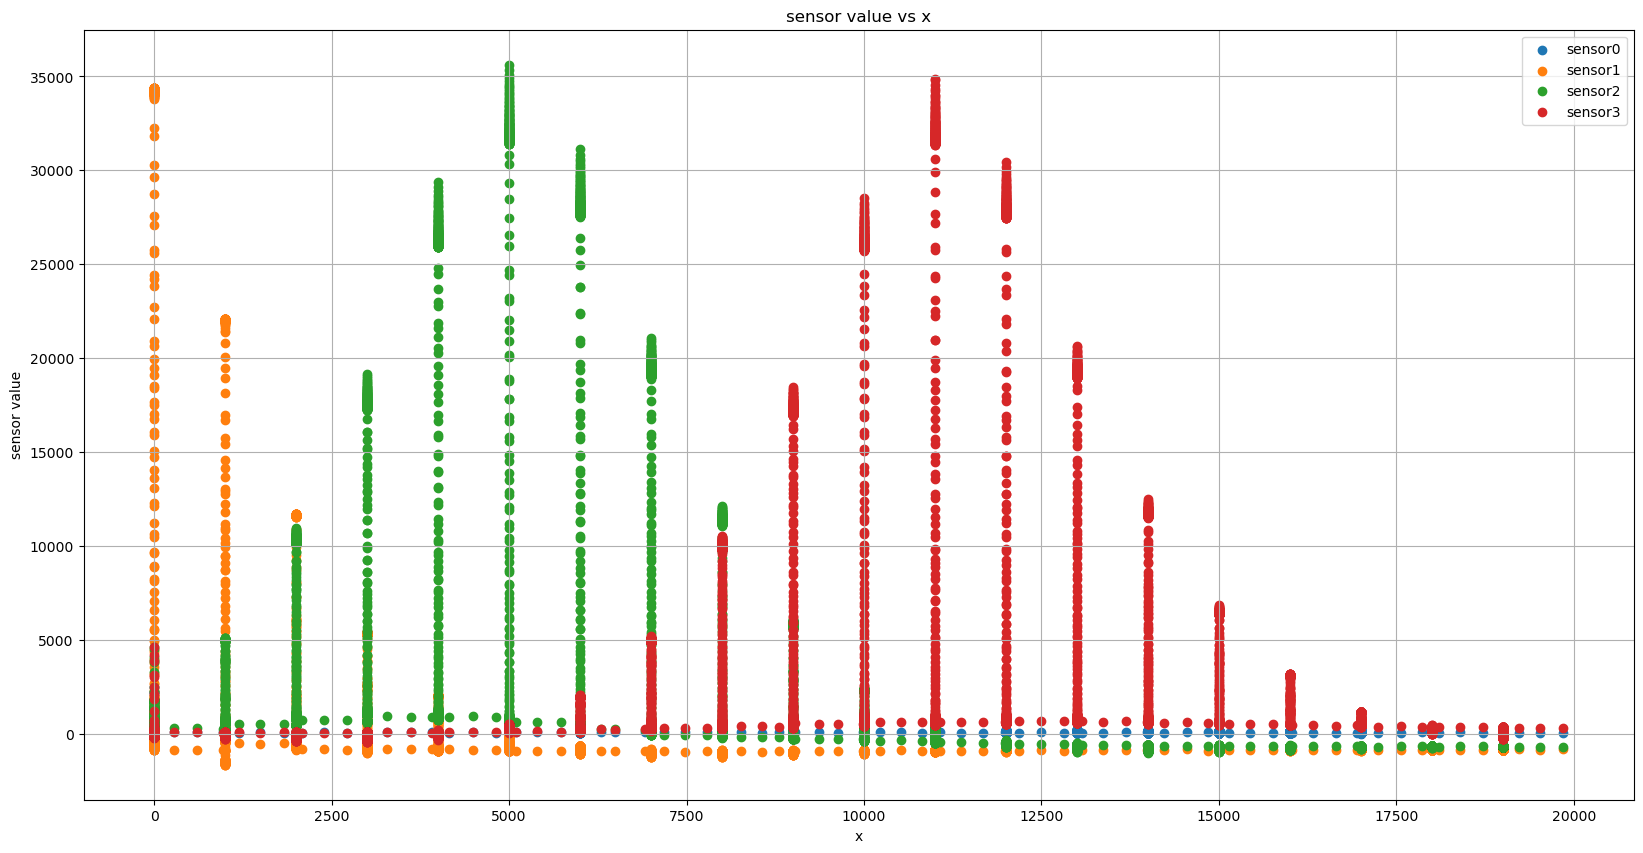

In [18]:
# Plot pressure vs x distance
plt.figure(figsize=(20,10))
plt.scatter(df['x'], df['Sensor_0'], label='sensor0')
plt.scatter(df['x'], df['Sensor_1'], label='sensor1')
plt.scatter(df['x'], df['Sensor_2'], label='sensor2')
plt.scatter(df['x'], df['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

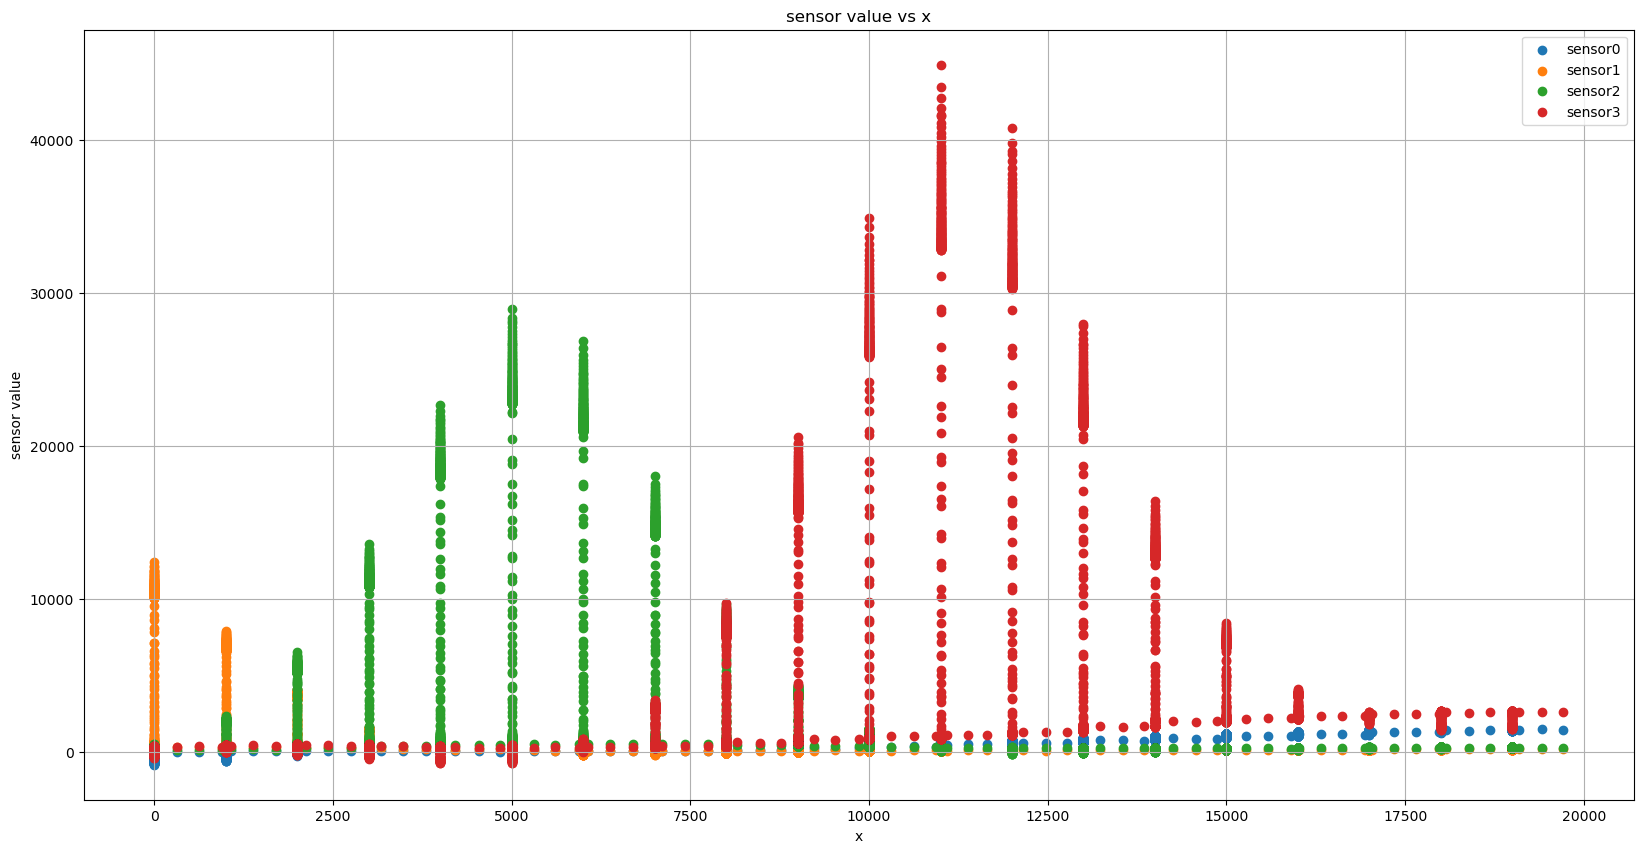

In [19]:
# Plot pressure vs x distance
plt.figure(figsize=(20,10))
plt.scatter(df_vac['x'], df_vac['Sensor_0'], label='sensor0')
plt.scatter(df_vac['x'], df_vac['Sensor_1'], label='sensor1')
plt.scatter(df_vac['x'], df_vac['Sensor_2'], label='sensor2')
plt.scatter(df_vac['x'], df_vac['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

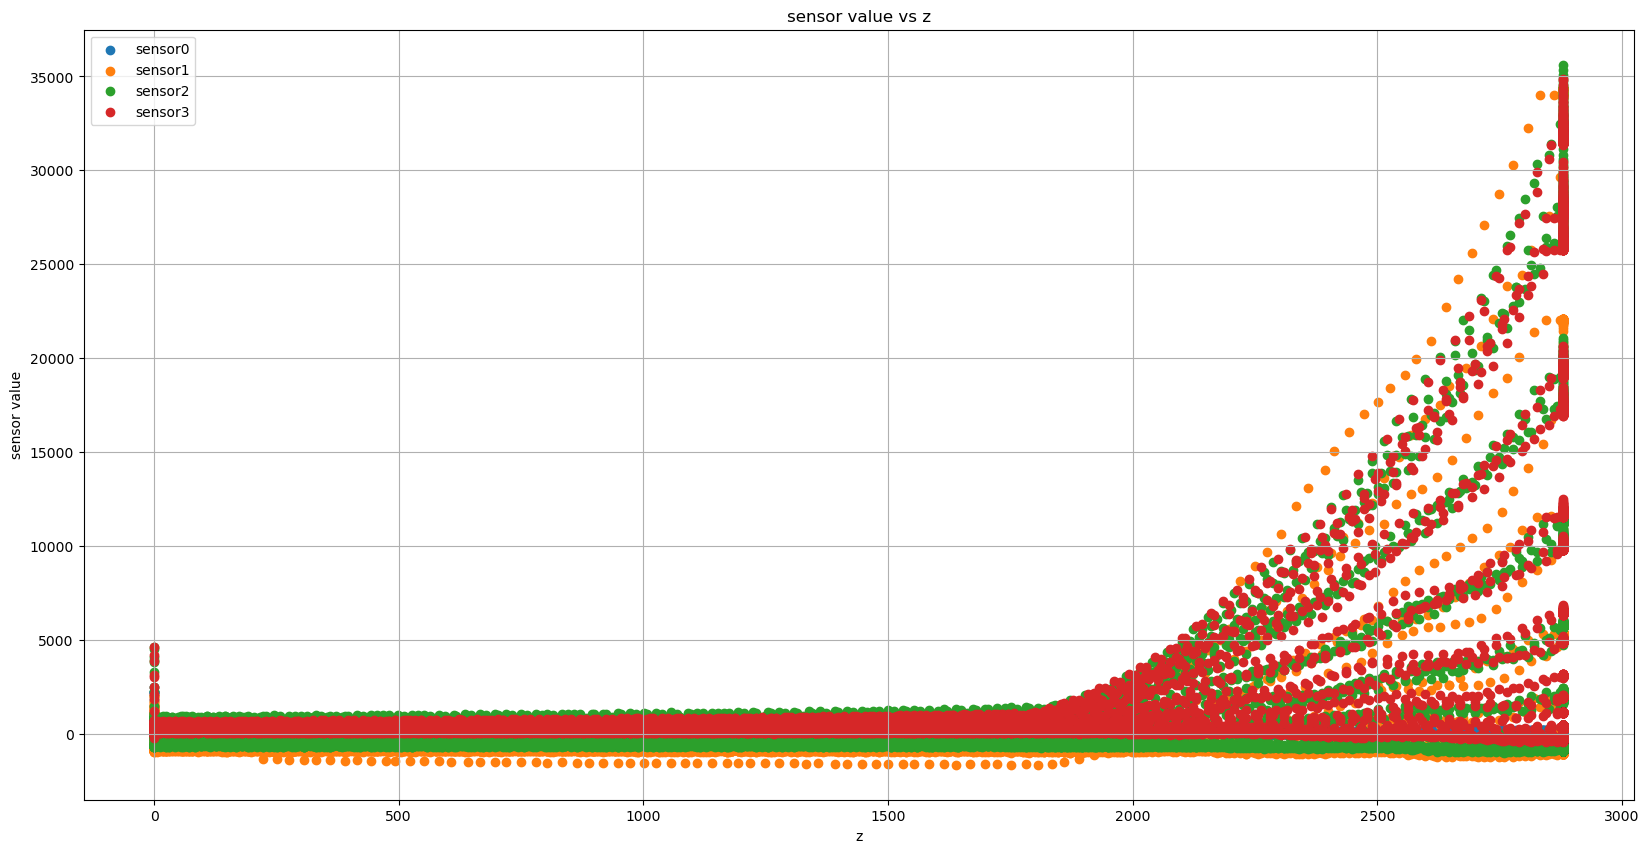

In [14]:
# Scatter Plot pressure vs z distance
plt.figure(figsize=(20,10))
plt.scatter(df['z'], df['Sensor_0'], label='sensor0')
plt.scatter(df['z'], df['Sensor_1'], label='sensor1')
plt.scatter(df['z'], df['Sensor_2'], label='sensor2')
plt.scatter(df['z'], df['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('z')
plt.ylabel('sensor value')
plt.title('sensor value vs z')
plt.grid(True)
plt.show()

interesting finding: some negative reading

calibrating: the feel of MEMD......


In [15]:
# Decrease the resolution of the data
df1 = df.iloc[1000:, 0:4]
df1 = df1.iloc[::3, :]
df1.shape

(2330, 4)

In [16]:
frame = 0
np.column_stack((np.arange(df1.shape[1]), df1.iloc[frame]))

array([[  0.    ,  42.6425],
       [  1.    , -36.4925],
       [  2.    , -47.4525],
       [  3.    ,  33.96  ]])

MovieWriter imagemagick unavailable; using Pillow instead.


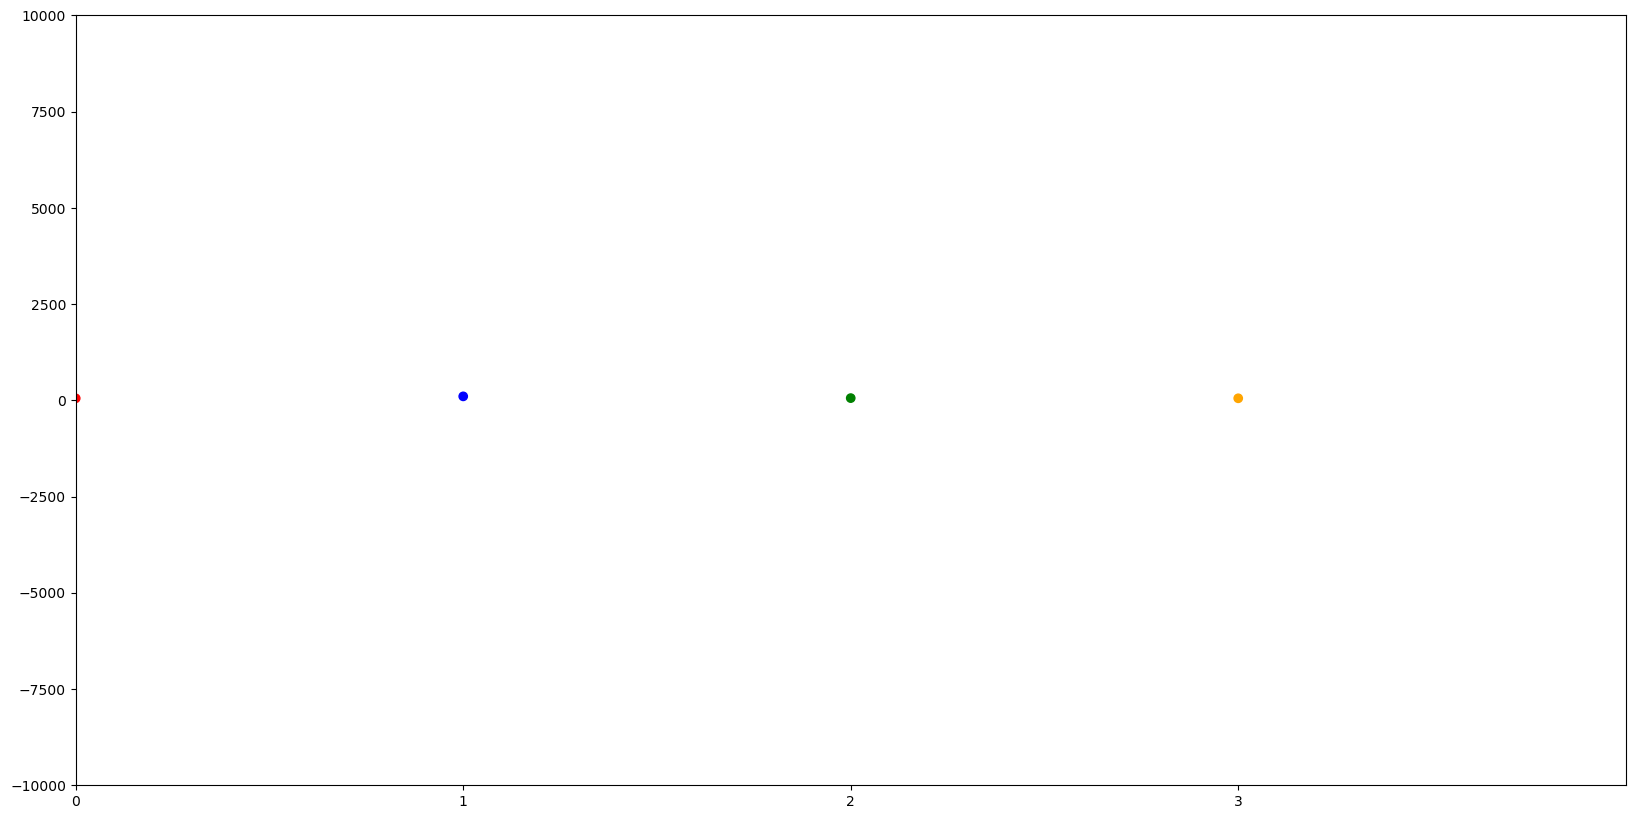

In [21]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set up an empty scatter plot
scatter = ax.scatter([], [])

# Set the limits of the plot
ax.set_xlim(0, df1.shape[1])
ax.set_ylim(-10000, 10000)

# Set the x-axis be the index of the data
ax.set_xticks(range(df1.shape[1]))

# Set the color of the points
scatter.set_facecolors(['red', 'blue', 'green', 'orange'])

# Set the size of the plot
fig.set_size_inches(20, 10)

# Animation update function
def update(frame):
    scatter.set_offsets(np.column_stack((np.arange(df1.shape[1]), df1.iloc[frame])))
    return scatter,

# Create the animation
animation = FuncAnimation(fig, update, frames=df1.shape[0], interval=2)
animation.save('test_0623_2.gif', writer='imagemagick')
# Show the animation
plt.show()



In [22]:
# Insert gif
from IPython.display import Image
Image(url='test_0623_2.gif')

## Estimation of interval pressure (resolution 4 -> 13)

In [37]:
superResCoeff = 3
data2 = np.zeros((df1.shape[0], (sensorNum-1)*superResCoeff+sensorNum))

In [40]:
superResCoeff = 3
data2 = np.zeros((df1.shape[0], (sensorNum-1)*superResCoeff+sensorNum))

# loop through the rows of data
for i in range(np.shape(data2)[0]):
    for j in range(np.shape(data2)[1]):
        # copy the data to the new array
        if j % 4 == 0:
            data2[i, j] = df1.iloc[i, int(j/4)]
        
        # filling the interval gaps with neighboring values by coefficient
        elif j % 4 == 1:
            data2[i, j] = df1.iloc[i, int(j/4)] * (superResCoeff/(superResCoeff+1)) + df1.iloc[i, int(j/4) + 1]  * (1 - superResCoeff/(superResCoeff+1))

        elif j % 4 == 2:
            data2[i, j] = df1.iloc[i, int(j/4)] * ((superResCoeff - 1)/(superResCoeff+1)) + df1.iloc[i, int(j/4) + 1]  * (1 - (superResCoeff - 1)/(superResCoeff+1))

        elif j % 4 == 3:
            data2[i, j] = df1.iloc[i, int(j/4)] * ((superResCoeff - 2)/(superResCoeff+1)) + df1.iloc[i, int(j/4) + 1]  * (1 - (superResCoeff - 2)/(superResCoeff+1))



In [42]:
data2.shape

(1142, 13)

MovieWriter imagemagick unavailable; using Pillow instead.


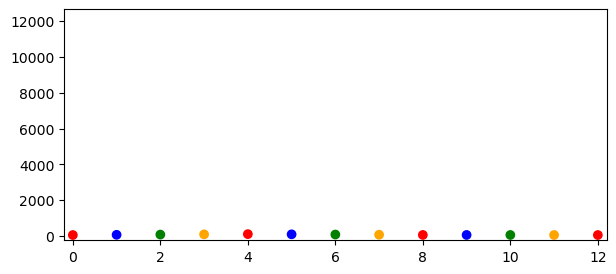

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Create a figure and axis
fig, ax = plt.subplots()

# Set up an empty scatter plot
scatter = ax.scatter([], [])

# Set the limits of the plot
ax.set_xlim(-0.2, data2.shape[1] - 0.8)
ax.set_ylim(np.min(data2)*0.9, np.max(data2)*1.1)

# # Set the x-axis be the index of the data
# ax.set_xticks(range(data2.shape[1]))

# Set the color of the points
scatter.set_facecolors(['red', 'blue', 'green', 'orange'])

# Set the size of the plot
fig.set_size_inches(7, 3)

# Animation update function
def update(frame):
    # Only update the y-axis data, if the value is the largest in the row
    # scatter.set_offsets(np.column_stack((np.arange(data2.shape[1]), data2[frame])))
    # Only update the y-axis data, if the value is the largest in the row
    for i in range(data2.shape[1]):
        
        if data2[frame, i] == np.max(data2[frame]):
            scatter.set_offsets(np.column_stack((np.arange(data2.shape[1]), data2[frame])))
            break

    # scatter.set_offsets(np.column_stack((np.arange(data2.shape[1]), data2[frame])))
    return scatter,

# Create the animation
animation = FuncAnimation(fig, update, frames=data2.shape[0], interval=400, blit=True)
animation.save('test_trend.gif', writer='imagemagick')
# Show the animation
# plt.show()

# Insert gif
from IPython.display import Image
Image(url='test_trend.gif')

The intersection of the lines is at x = 54.39999999999991 and y = 73.90999999999622


(54.39999999999991, 73.90999999999622)

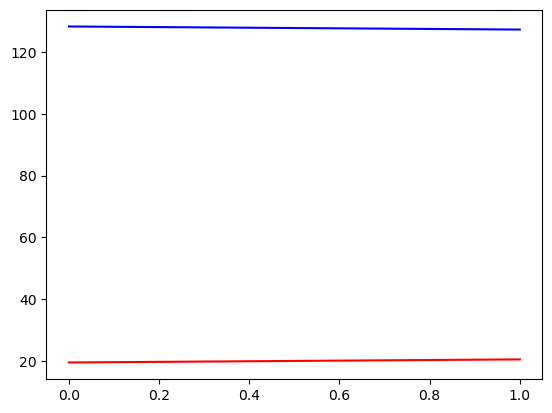

In [47]:

# a function y = 1 - x
def yLeft(b, x):
    return b + x

# a function y = 0 + x
def yRight(b, x):
    return b + 1  -  x


# # draw a line y=1-x
# x = np.linspace(0, 1, 100)
# y = yLeft(1, x)

# # draw a line y=0+x
# x2 = np.linspace(0, 1, 100)
# y2 = yRight(1, x2)

# # plot the lines
# plt.plot(x, y, '-r', label='y=1-x')
# plt.plot(x2, y2, '-b', label='y=-1+x')



# a function find the intersection of the two lines
def findIntersection(x1, y1, x2, y2):
    a1 = y1[1] - y1[0]
    b1 = x1[0] - x1[1]
    c1 = a1*x1[0] + b1*y1[0]

    a2 = y2[1] - y2[0]
    b2 = x2[0] - x2[1]
    c2 = a2*x2[0] + b2*y2[0]

    determinant = a1*b2 - a2*b1

    if determinant == 0:
        print("The lines are parallel")
    else:
        x = (b2*c1 - b1*c2)/determinant
        y = (a1*c2 - a2*c1)/determinant
        print("The intersection of the lines is at x = " + str(x) + " and y = " + str(y))

    return x, y

# use data[0,0], data[0,1] to find the intersection
x = np.linspace(0, 1, 100)
y = yLeft(df1.iloc[18,0], x)
x2 = np.linspace(0, 1, 100)
y2 = yRight(df1.iloc[18,1], x2)

# plot the lines
plt.plot(x, y, '-r', label='y=1-x')
plt.plot(x2, y2, '-b', label='y=-1+x')

# find the intersection
findIntersection(x, y, x2, y2)



In [355]:
# create a 3d numpy array
data3 = np.zeros((len(data), sensorNum-1, 2))

# loop through the rows of data
for i in range(np.shape(data3)[0]):
    #loop through the columns of data
    for j in range(np.shape(data3)[1]):
        # find the intersection of the two lines
        x = np.linspace(0, 1, 100)
        y = yLeft(data[i,j], x)
        x2 = np.linspace(0, 1, 100)
        y2 = yRight(data[i,j+1], x2)
        # store the intersection in the array
        data3[i,j,0], data3[i,j,1] = findIntersection(x, y, x2, y2)
        data3[i,j,1] = (data3[i,j,1] - 0.5)*2

The intersection of the lines is at x = 0.5000005508569406 and y = 0.5002666839011681
The intersection of the lines is at x = 0.4998426139028314 and y = 0.5001098486609378
The intersection of the lines is at x = 0.500015176638283 and y = 0.4999676392020499
The intersection of the lines is at x = 0.4999584464094496 and y = 0.5000703632856645
The intersection of the lines is at x = 0.499967108371688 and y = 0.49999591806679977
The intersection of the lines is at x = 0.5000356709404279 and y = 0.4999986973789131
The intersection of the lines is at x = 0.5000545817298303 and y = 0.4999990639093458
The intersection of the lines is at x = 0.4999705362117347 and y = 0.5000241818509084
The intersection of the lines is at x = 0.4999940488888461 and y = 0.49998876695148686
The intersection of the lines is at x = 0.49999269045152844 and y = 0.49986226763515224
The intersection of the lines is at x = 0.5000910077374193 and y = 0.49994596582409756
The intersection of the lines is at x = 0.499992969

In [52]:
# create an numpy array base on the x-axis of data, each row is 1,2,3,4,5,6,7,8,9,10
x = np.tile(np.arange(0, sensorNum), (len(df1.shape[0]), 1))
y = df1.iloc[:,:]

# create an empty numpy array, with the row sensorNum*2+1, collum len(data)
data4 = np.zeros((len(df1.iloc[:,:]), sensorNum*2-1, 2))

# loop through the rows of data, and filling the gaps between the two lines, insert the intersection values into data4
for i in range(np.shape(data4)[0]):
    # loop through the columns of data
    for j in range(np.shape(data4)[1]):
        # if the column is even, then insert the original values
        if j % 2 == 0:
            data4[i, j, 0] = int(j/2)
            data4[i, j, 1] = df1.iloc[i, int(j/2)]
        # if the column is odd, then insert the intersection values
        else:
            data4[i, j, 0] = data3[i, int(j/2), 0]+ int(j/2)
            data4[i, j, 1] = data3[i, int(j/2), 1]

data4


TypeError: object of type 'int' has no len()

MovieWriter imagemagick unavailable; using Pillow instead.


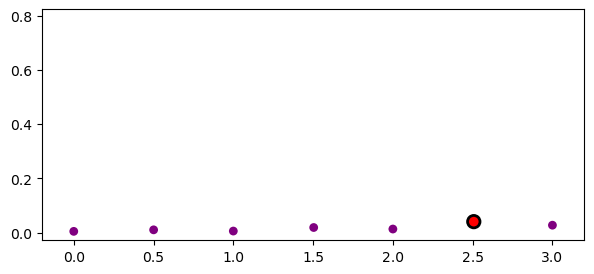

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Create a figure and axis
fig, ax = plt.subplots()

# Set up an empty scatter plot
scatter = ax.scatter([], [])

# Set the limits of the plot
ax.set_xlim(-0.2, data.shape[1] - 0.8)
ax.set_ylim(np.min(data4[:,:,1])*0.9, np.max(data4[:,:,1])*1.1)

# # Set the color of the points
# scatter.set_facecolors(['red','purple','blue','purple', 'green','purple', 'orange',])

# Set the size of the plot
fig.set_size_inches(7, 3)

# Animation update function
def update(frame):
    scatter.set_offsets(np.column_stack((data4[frame,:,0], data4[frame,:,1])))

    # Find the maximum value and its index
    max_value = np.max(data4[frame, :, 1])
    max_index = np.argmax(data4[frame, :, 1])

    # Create a color array with the same length as the data
    colors = ['red' if i == max_index else 'purple' for i in range(len(data4[frame, :, 1]))]

    # Update the facecolors of the scatter plot
    scatter.set_facecolor(colors)

    # Set a big hollow circle around the largest value
    circle_size = [80 if i == max_index else 40 for i in range(len(data4[frame, :, 1]))]
    scatter.set_sizes(circle_size)
    scatter.set_edgecolors(['black' if i == max_index else 'none' for i in range(len(data4[frame, :, 1]))])
    scatter.set_linewidths([2 if i == max_index else 0 for i in range(len(data4[frame, :, 1]))])

    
    return scatter,

# Create the animation
animation = FuncAnimation(fig, update, frames=data4.shape[0], interval=400, blit=True)
animation.save('test_sr.gif', writer='imagemagick')
# Show the animation
plt.show()

# Insert gif
from IPython.display import Image
Image(url='test_sr.gif')